In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cars_df = pd.read_csv('data/CarsData.csv')
cars_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [23]:
from dash import Dash, dcc, html, Input, Output

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Analysis of the cars sales based on '),
    dcc.Graph(id="graph"),
    html.P("Names:"),
    dcc.Dropdown(id='names',
        options=['Manufacturer', 'transmission', 'fuelType'],
        value='model', 
        multi=False,
        clearable=False
    ),
    html.P("Values:"),
    dcc.Dropdown(id='values',
        options=['price'],
        value='price', clearable=False
    ),
])


@app.callback(
    Output("graph", "figure"), 
    Input("names", "value"), 
    Input("values", "value"))
def generate_chart(names, values):
    df = cars_df # replace with your own data source
    fig = sns.countplot(df, x=names, y=values, hue="fuelType")
    #fig = px.pie(df, values=values, names=names, hole=.3)
    return fig

app.run_server(debug=True)

/Users/nikoma/Documents/Greenbootcamps/DS_final_project/.venv/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[23], line 34, in generate_chart(names='model', values='price')
     28 @app.callback(
     29     Output("graph", "figure"), 
     30     Input("names", "value"), 
     31     Input("values", "value"))
     32 def generate_chart(names, values):
     33     df = cars_df # replace with your own data source
---> 34     fig = sns.countplot(df, x=names, y=values, hue="fuelType")
        df =                model  year  price transmission  mileage fuelType  tax   mpg   
0                I10  2017   7495       Manual    11630   Petrol  145  60.1  \
1               Polo  2017  10989       Manual     9200   Petrol  145  58.9   
2           2 Series  2019  27990    Semi-Auto     1614   Diesel  145  49.6   
3       Yeti Outdoor  2017  12495       Manual    30960   Diesel  150  62.8   
4             Fiesta  2017   7999       Manual    19353

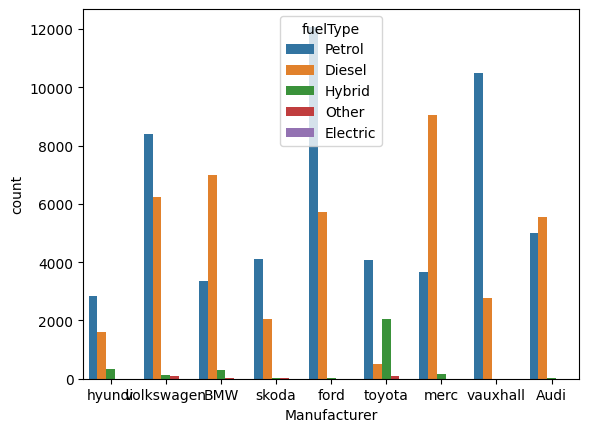

In [10]:
import seaborn as sns

fig = sns.countplot(data=cars_df, x="Manufacturer", hue="fuelType")

<AxesSubplot:xlabel='transmission', ylabel='price'>

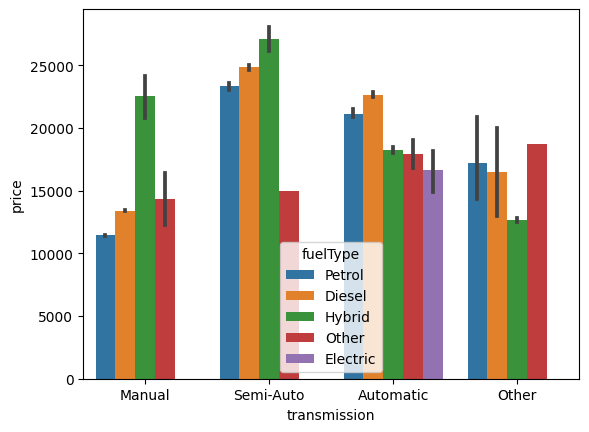

In [15]:
sns.barplot(data=cars_df, x="transmission", y="price", hue="fuelType")

<AxesSubplot:xlabel='fuelType', ylabel='price'>

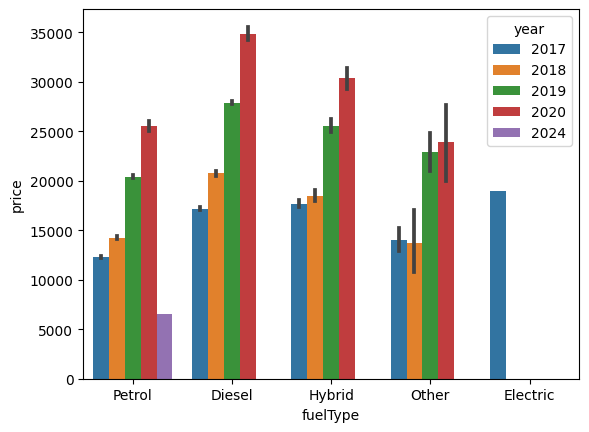

In [18]:
sns.barplot(data=cars_df.query("year > 2016"), x="fuelType", y="price", hue="year")

<AxesSubplot:xlabel='Manufacturer', ylabel='price'>

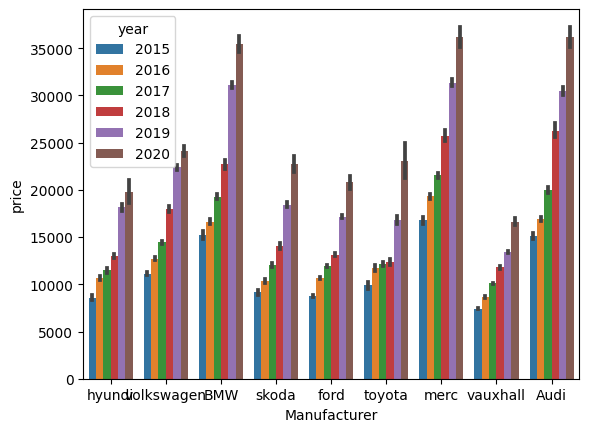

In [22]:
sns.barplot(data=cars_df.query("2021 > year > 2014"), x="Manufacturer", y="price", hue="year")

Text(0.5, 0, 'Price')

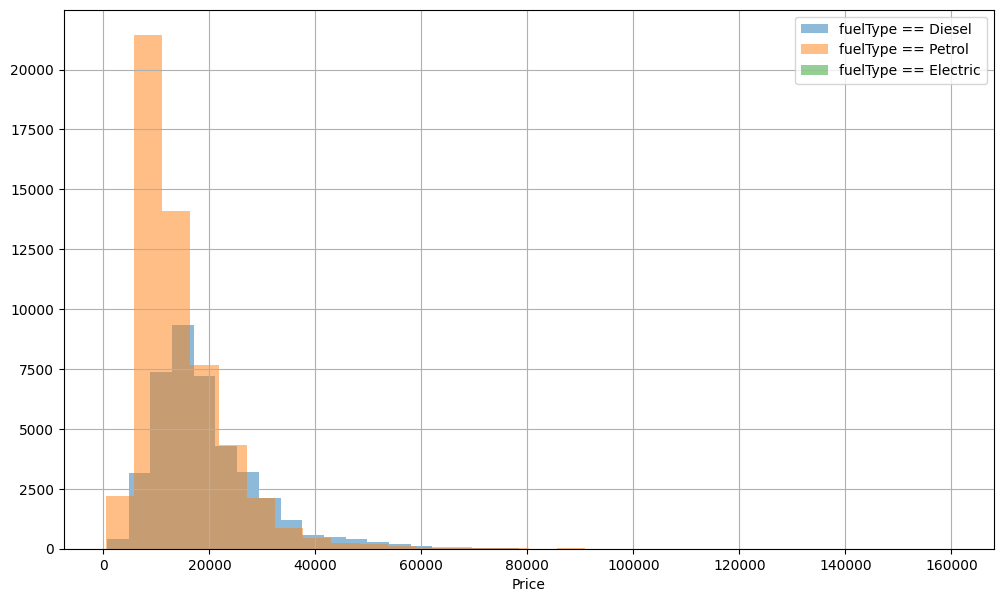

In [4]:
figure = plt.figure(figsize=(12,7))
cars_df.query("fuelType == 'Diesel'")['price'].hist(alpha=0.5, bins=30, label='fuelType == Diesel')
cars_df.query("fuelType == 'Petrol'")['price'].hist(alpha=0.5, bins=30, label='fuelType == Petrol')
cars_df.query("fuelType == 'Electric'")['price'].hist(alpha=0.5, bins=30, label='fuelType == Electric')


plt.legend()
plt.xlabel('Price')